In [46]:
import pandas as pd

In [66]:
# jobindex
df_raw = pd.read_csv('../data/jobindex_2021.csv', engine='python')
df_raw['date'] = pd.to_datetime(df_raw['date'])

df_raw['title'] = df_raw['title'].str.lower()

df_final = pd.DataFrame()

In [67]:
def analyse_title(job_title):
    
    job_title = job_title.lower()
    
    df_no_dup = df_raw.loc[df_raw['title'].str.contains(job_title, na=False)]

    # group counts by type
    df_count = df_no_dup[['title', 'date']].groupby('date').count().reset_index()

    # filter only from 2010 upwards
    df_filtered = df_count[(df_count['date'] >= '2017-01-01') & (df_count['date'] <= '2020-12-31')]

    # organize df_jobindex by quarter
    df_ji = df_filtered.resample('Q', convention='end', on='date').agg('sum').reset_index()
    
    df_ji.columns = ['date', 'count']

    ax =df_ji.set_index('date').plot(figsize=(11,7))
    ax.set_ylabel("number of jobs", fontsize=15)
    ax.set_xlabel("year (by quarter)", fontsize=15)
    ax.set_title(job_title)
    
    print(df_ji)
    
    df_final[job_title] = df_ji['count']
    df_final['date'] = df_ji['date']

         date  count
0  2017-03-31   1818
1  2017-06-30   1651
2  2017-09-30   1416
3  2017-12-31   1869
4  2018-03-31   1933
5  2018-06-30   2025
6  2018-09-30   1719
7  2018-12-31   1847
8  2019-03-31   2129
9  2019-06-30   1818
10 2019-09-30   1630
11 2019-12-31   1805
12 2020-03-31   2184
13 2020-06-30   1894
14 2020-09-30   1895
15 2020-12-31   2306


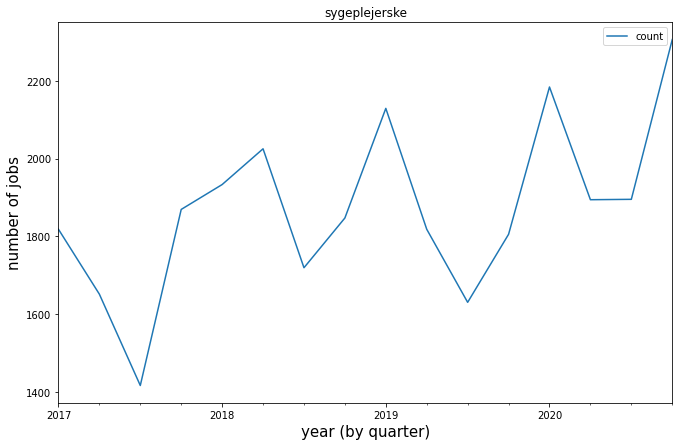

In [68]:
analyse_title('Sygeplejerske')

         date  count
0  2017-03-31    738
1  2017-06-30    685
2  2017-09-30    553
3  2017-12-31    428
4  2018-03-31    625
5  2018-06-30    805
6  2018-09-30    524
7  2018-12-31    434
8  2019-03-31    583
9  2019-06-30    623
10 2019-09-30    509
11 2019-12-31    421
12 2020-03-31    457
13 2020-06-30    329
14 2020-09-30    467
15 2020-12-31    214


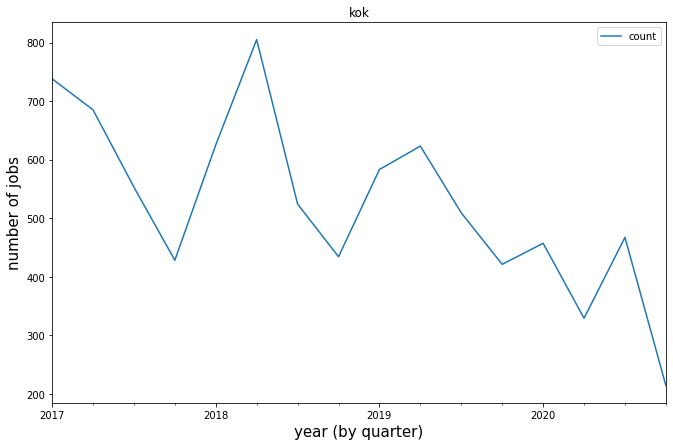

In [69]:
analyse_title('Kok')

         date  count
0  2017-03-31     52
1  2017-06-30     45
2  2017-09-30     38
3  2017-12-31     37
4  2018-03-31     27
5  2018-06-30     39
6  2018-09-30     29
7  2018-12-31     32
8  2019-03-31     39
9  2019-06-30     31
10 2019-09-30     17
11 2019-12-31     23
12 2020-03-31     12
13 2020-06-30     13
14 2020-09-30     25
15 2020-12-31     19


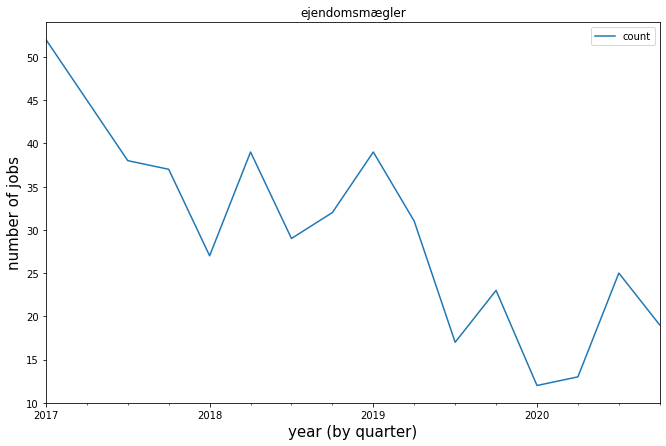

In [70]:
analyse_title('Ejendomsmægler')

         date  count
0  2017-03-31    287
1  2017-06-30    242
2  2017-09-30    259
3  2017-12-31    337
4  2018-03-31    269
5  2018-06-30    250
6  2018-09-30    233
7  2018-12-31    234
8  2019-03-31    300
9  2019-06-30    222
10 2019-09-30    211
11 2019-12-31    198
12 2020-03-31    208
13 2020-06-30    175
14 2020-09-30    279
15 2020-12-31    323


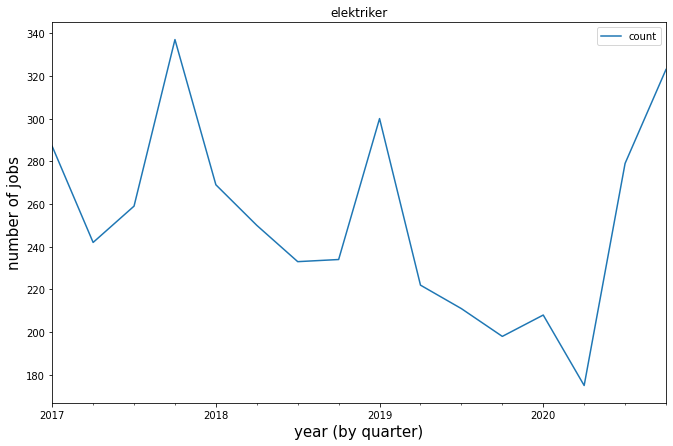

In [71]:
analyse_title('Elektriker')

         date  count
0  2017-03-31     34
1  2017-06-30     47
2  2017-09-30     40
3  2017-12-31     50
4  2018-03-31     41
5  2018-06-30     35
6  2018-09-30     39
7  2018-12-31     45
8  2019-03-31     37
9  2019-06-30     43
10 2019-09-30     29
11 2019-12-31     40
12 2020-03-31     30
13 2020-06-30     29
14 2020-09-30     37
15 2020-12-31     41


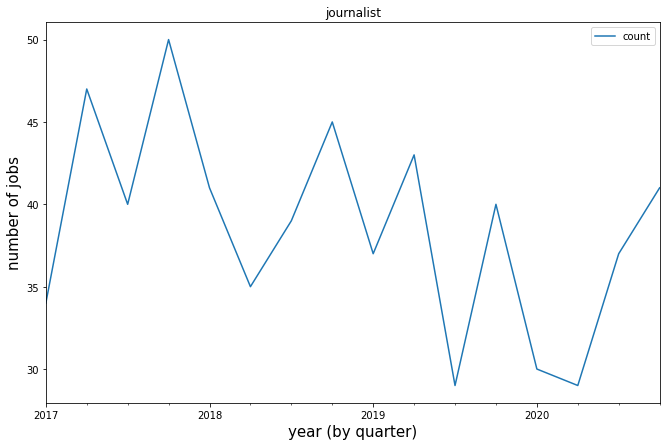

In [72]:
analyse_title('Journalist')

         date  count
0  2017-03-31   1212
1  2017-06-30   1112
2  2017-09-30    919
3  2017-12-31   1168
4  2018-03-31   1203
5  2018-06-30   1280
6  2018-09-30    931
7  2018-12-31   1149
8  2019-03-31   1314
9  2019-06-30   1204
10 2019-09-30   1064
11 2019-12-31   1202
12 2020-03-31   1510
13 2020-06-30   1147
14 2020-09-30   1188
15 2020-12-31   1417


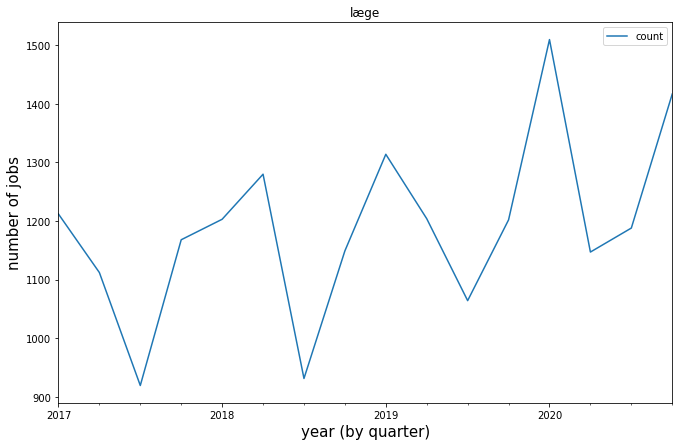

In [73]:
analyse_title('Læge')

         date  count
0  2017-03-31     38
1  2017-06-30     34
2  2017-09-30     37
3  2017-12-31     52
4  2018-03-31     79
5  2018-06-30     80
6  2018-09-30     52
7  2018-12-31     61
8  2019-03-31     66
9  2019-06-30     62
10 2019-09-30     58
11 2019-12-31     44
12 2020-03-31     36
13 2020-06-30     63
14 2020-09-30     66
15 2020-12-31     70


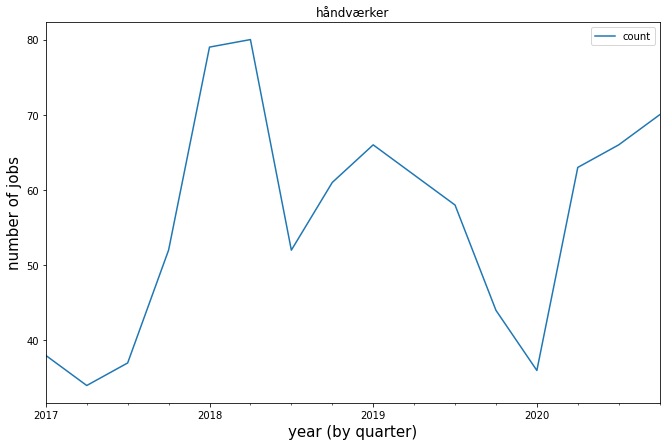

In [74]:
analyse_title('Håndværker')

In [75]:
df_final.set_index('date', inplace=True)

df_final

,sygeplejerske,kok,ejendomsmægler,elektriker,journalist,læge,håndværker
date,,,,,,,
2017-03-31,1818,738,52,287,34,1212,38
2017-06-30,1651,685,45,242,47,1112,34
2017-09-30,1416,553,38,259,40,919,37
2017-12-31,1869,428,37,337,50,1168,52
2018-03-31,1933,625,27,269,41,1203,79
2018-06-30,2025,805,39,250,35,1280,80
2018-09-30,1719,524,29,233,39,931,52
2018-12-31,1847,434,32,234,45,1149,61
2019-03-31,2129,583,39,300,37,1314,66


In [76]:
# df_final.to_csv('../data/jobs_quarter.csv')

df_final.columns

Index(['sygeplejerske', 'kok', 'ejendomsmægler', 'elektriker', 'journalist',
       'læge', 'håndværker'],
      dtype='object')

In [77]:
from sklearn.preprocessing import MinMaxScaler

In [78]:
data = df_final

In [79]:
scaler = MinMaxScaler()

scaler.fit(data)

MinMaxScaler()

In [80]:
scaler.data_max_

array([2306.,  805.,   52.,  337.,   50., 1510.,   80.])

In [81]:
transformed = scaler.transform(df_final.values)

In [82]:
df = pd.DataFrame(index=df_final.index, data=transformed, columns=df_final.columns)

In [83]:
df

,sygeplejerske,kok,ejendomsmægler,elektriker,journalist,læge,håndværker
date,,,,,,,
2017-03-31,0.451685,0.886633,1.000,0.691358,0.238095,0.495770,0.086957
2017-06-30,0.264045,0.796954,0.825,0.413580,0.857143,0.326565,0.000000
2017-09-30,0.000000,0.573604,0.650,0.518519,0.523810,0.000000,0.065217
2017-12-31,0.508989,0.362098,0.625,1.000000,1.000000,0.421320,0.391304
2018-03-31,0.580899,0.695431,0.375,0.580247,0.571429,0.480541,0.978261
2018-06-30,0.684270,1.000000,0.675,0.462963,0.285714,0.610829,1.000000
2018-09-30,0.340449,0.524535,0.425,0.358025,0.476190,0.020305,0.391304
2018-12-31,0.484270,0.372250,0.500,0.364198,0.761905,0.389171,0.586957
2019-03-31,0.801124,0.624365,0.675,0.771605,0.380952,0.668359,0.695652


In [111]:
from matplotlib import style
style.use('fast')

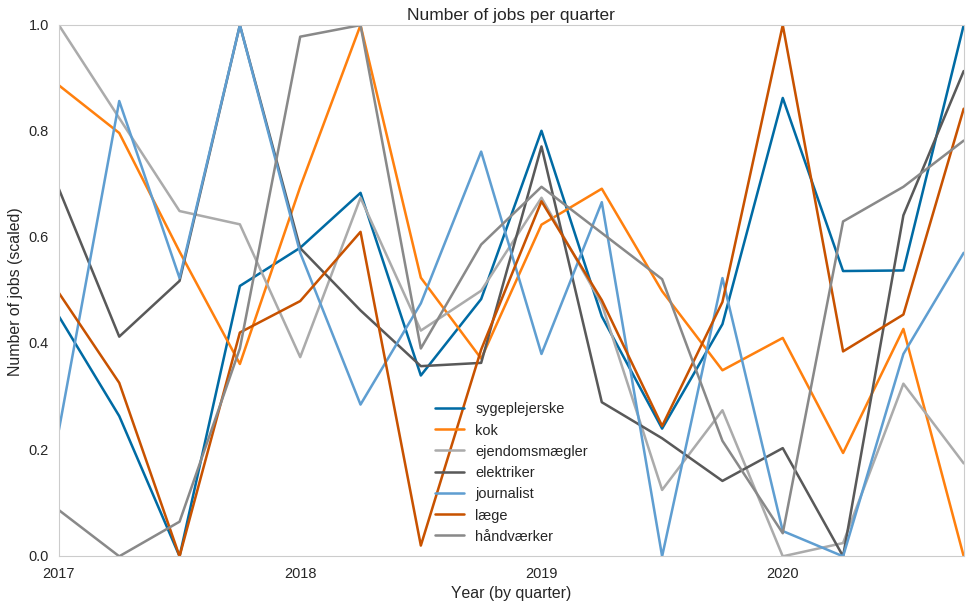

In [118]:
ax = df.plot(figsize=(13,8))

ax.set_xlabel('Year (by quarter)')
ax.set_ylabel('Number of jobs (scaled)')
ax.set_title('Number of jobs per quarter')
ax.grid(False)



In [119]:
ax.get_figure().savefig('test.png')